In [16]:
# to avoid warnings

# pip install --force-reinstall https://github.com/mwaskom/seaborn/archive/refs/heads/master.tar.gz

In [1]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from torch import nn
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.base import BaseEstimator

from utils import *


In [4]:
classes = ['Beach','Sunset','FallFoliage','Field','Mountain','Urban']

input_features = ['Att' + str(i) for i in range(1,295)]

In [5]:
exp_name = 'scene'

0       2.0
1       1.0
2       1.0
3       2.0
4       1.0
       ... 
1191    1.0
1192    1.0
1193    1.0
1194    1.0
1195    1.0
Length: 1196, dtype: float64
Distribution of the number of positive classes for each data point:
 1.0    1093
2.0     103
Name: count, dtype: int64


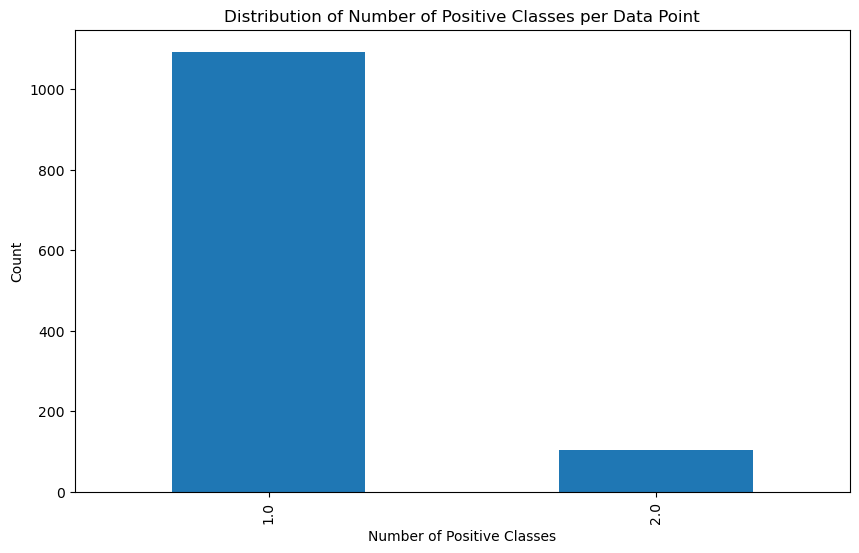

In [6]:
test_data, test_labels = load_scene(partition='Test')
test_labels = make_binary(test_labels, classes)
positive_class_counts = test_labels.sum(axis=1)
print(positive_class_counts)
print("Distribution of the number of positive classes for each data point:\n", positive_class_counts.value_counts())
plt.figure(figsize=(10, 6))
positive_class_counts.value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Number of Positive Classes per Data Point')
plt.xlabel('Number of Positive Classes')
plt.ylabel('Count')
plt.show()

In [7]:
train_data, train_labels = load_scene(partition='Train')
train_labels = make_binary(train_labels, classes)
for c in train_labels.columns:
    print("'" + c +"',")

'Beach',
'Sunset',
'FallFoliage',
'Field',
'Mountain',
'Urban',


Positive samples for each class:
Beach          227.0
Sunset         165.0
FallFoliage    197.0
Field          196.0
Mountain       277.0
Urban          224.0

/home/pyla/miniconda3/envs/bfn2/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pyla/miniconda3/envs/bfn2/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pyla/miniconda3/envs/bfn2/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pyla/miniconda3/envs/bfn2/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. 

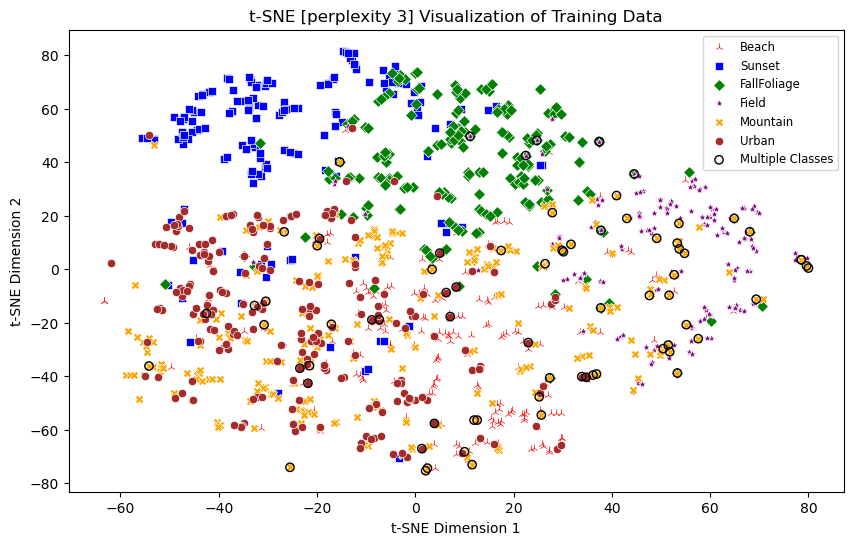

In [9]:
markers = ['2', 's', 'D', '*', 'X', 'o']
colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown']

X_embedded = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform(train_data.values)

plt.figure(figsize=(10, 6))
for i, class_name in enumerate(classes):
    idx = train_labels[class_name] == 1.0
    sns.scatterplot(x=X_embedded[idx, 0], y=X_embedded[idx, 1], marker=markers[i], color=colors[i], label=class_name)

multi_class_idx = train_labels.sum(axis=1) > 1
plt.scatter(X_embedded[multi_class_idx, 0], X_embedded[multi_class_idx, 1], facecolors='none', edgecolors='black', label='Multiple Classes')

plt.title('t-SNE [perplexity 3] Visualization of Training Data')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend(fontsize='small')
plt.show()

/home/pyla/miniconda3/envs/bfn2/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pyla/miniconda3/envs/bfn2/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pyla/miniconda3/envs/bfn2/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pyla/miniconda3/envs/bfn2/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. 

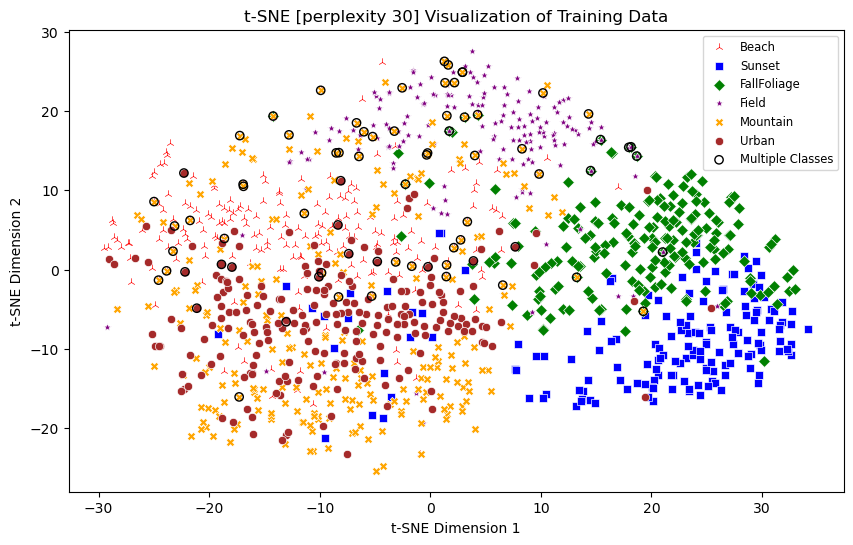

In [10]:
markers = ['2', 's', 'D', '*', 'X', 'o']
colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown']

X_embedded = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=30).fit_transform(train_data.values)

plt.figure(figsize=(10, 6))
for i, class_name in enumerate(classes):
    idx = train_labels[class_name] == 1.0
    sns.scatterplot(x=X_embedded[idx, 0], y=X_embedded[idx, 1], marker=markers[i], color=colors[i], label=class_name)

multi_class_idx = train_labels.sum(axis=1) > 1
plt.scatter(X_embedded[multi_class_idx, 0], X_embedded[multi_class_idx, 1], facecolors='none', edgecolors='black', label='Multiple Classes')

plt.title('t-SNE [perplexity 30] Visualization of Training Data')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend(fontsize='small')
plt.show()

/home/pyla/miniconda3/envs/bfn2/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pyla/miniconda3/envs/bfn2/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pyla/miniconda3/envs/bfn2/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pyla/miniconda3/envs/bfn2/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. 

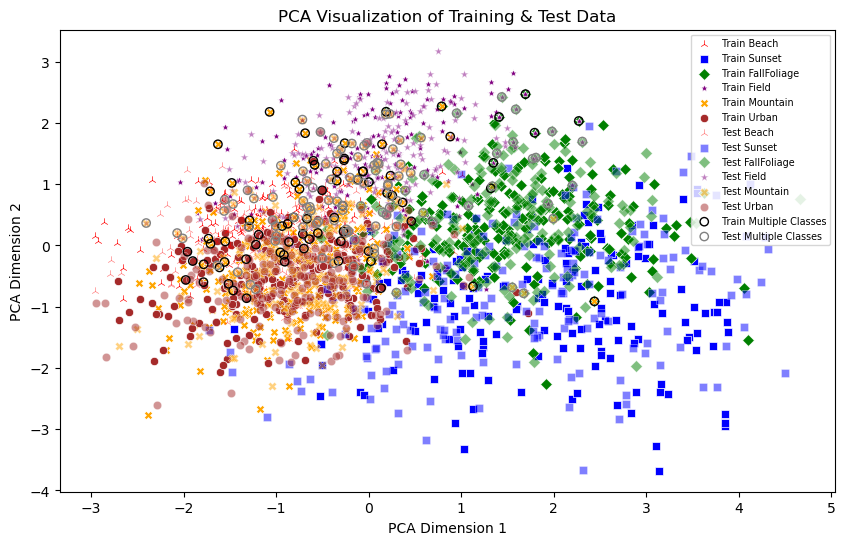

In [13]:
markers = ['2', 's', 'D', '*', 'X', 'o']
colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown']

pca = PCA(n_components=2)
X_embedded_pca = pca.fit_transform(train_data.values)
X_embedded_test_pca = pca.transform(test_data.values)

plt.figure(figsize=(10, 6))
for i, class_name in enumerate(classes):
    idx = train_labels[class_name] == 1.0
    sns.scatterplot(x=X_embedded_pca[idx, 0], y=X_embedded_pca[idx, 1], marker=markers[i], color=colors[i], label=f'Train {class_name}')
for i, class_name in enumerate(classes):
    idx = test_labels[class_name] == 1.0
    sns.scatterplot(x=X_embedded_test_pca[idx, 0], y=X_embedded_test_pca[idx, 1], marker=markers[i], color=colors[i], label=f'Test {class_name}', alpha=0.5)
                    
multi_class_idx_train = train_labels.sum(axis=1) > 1
plt.scatter(X_embedded_pca[multi_class_idx_train, 0], X_embedded_pca[multi_class_idx_train, 1], facecolors='none', edgecolors='black', label='Train Multiple Classes')

multi_class_idx_test = test_labels.sum(axis=1) > 1
plt.scatter(X_embedded_test_pca[multi_class_idx_test, 0], X_embedded_test_pca[multi_class_idx_test, 1], facecolors='none', edgecolors='gray', label='Test Multiple Classes')

plt.title('PCA Visualization of Training & Test Data')
plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')
plt.legend(fontsize='x-small')
plt.show()

Normalized positive samples for each class:
 Beach          0.187448
Sunset         0.136251
FallFoliage    0.162675
Field          0.161850
Mountain       0.228737
Urban          0.184971
dtype: float64


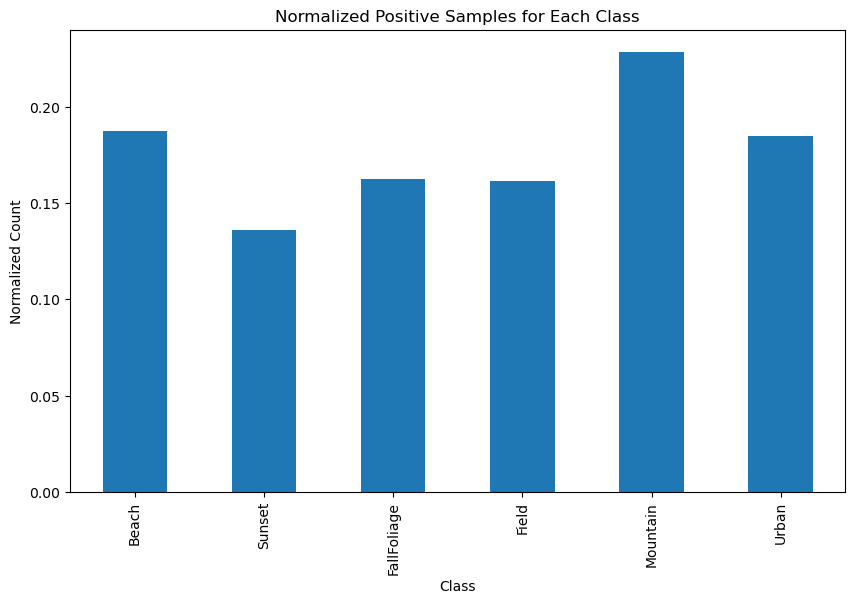

Correlation matrix:
                 Beach    Sunset  FallFoliage     Field  Mountain     Urban
Beach        1.000000 -0.190762    -0.211704 -0.211062 -0.155778 -0.163420
Sunset      -0.190762  1.000000    -0.175061 -0.174530 -0.216293 -0.189209
FallFoliage -0.211704 -0.175061     1.000000 -0.145093 -0.208077 -0.209981
Field       -0.211062 -0.174530    -0.145093  1.000000 -0.095187 -0.203570
Mountain    -0.155778 -0.216293    -0.208077 -0.095187  1.000000 -0.254374
Urban       -0.163420 -0.189209    -0.209981 -0.203570 -0.254374  1.000000


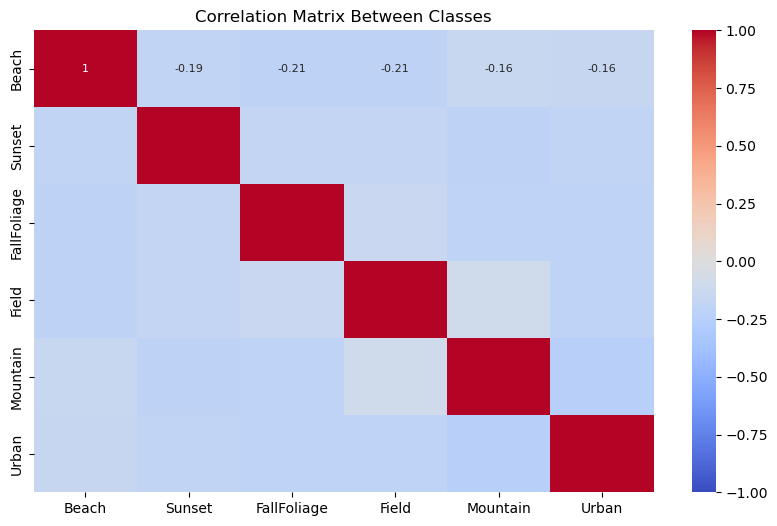

Distribution of the number of positive classes for each data point:
 1.0    1137
2.0      73
3.0       1
Name: count, dtype: int64


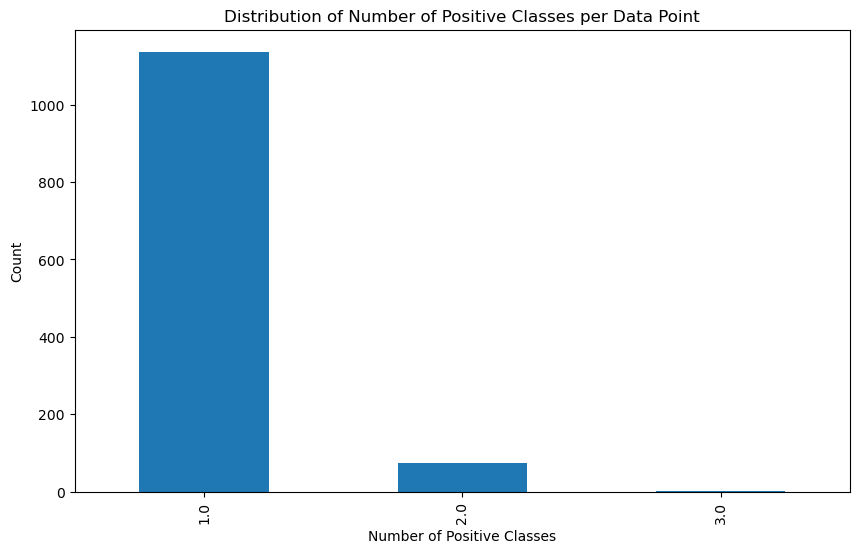

/home/pyla/miniconda3/envs/bfn2/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pyla/miniconda3/envs/bfn2/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pyla/miniconda3/envs/bfn2/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pyla/miniconda3/envs/bfn2/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. 

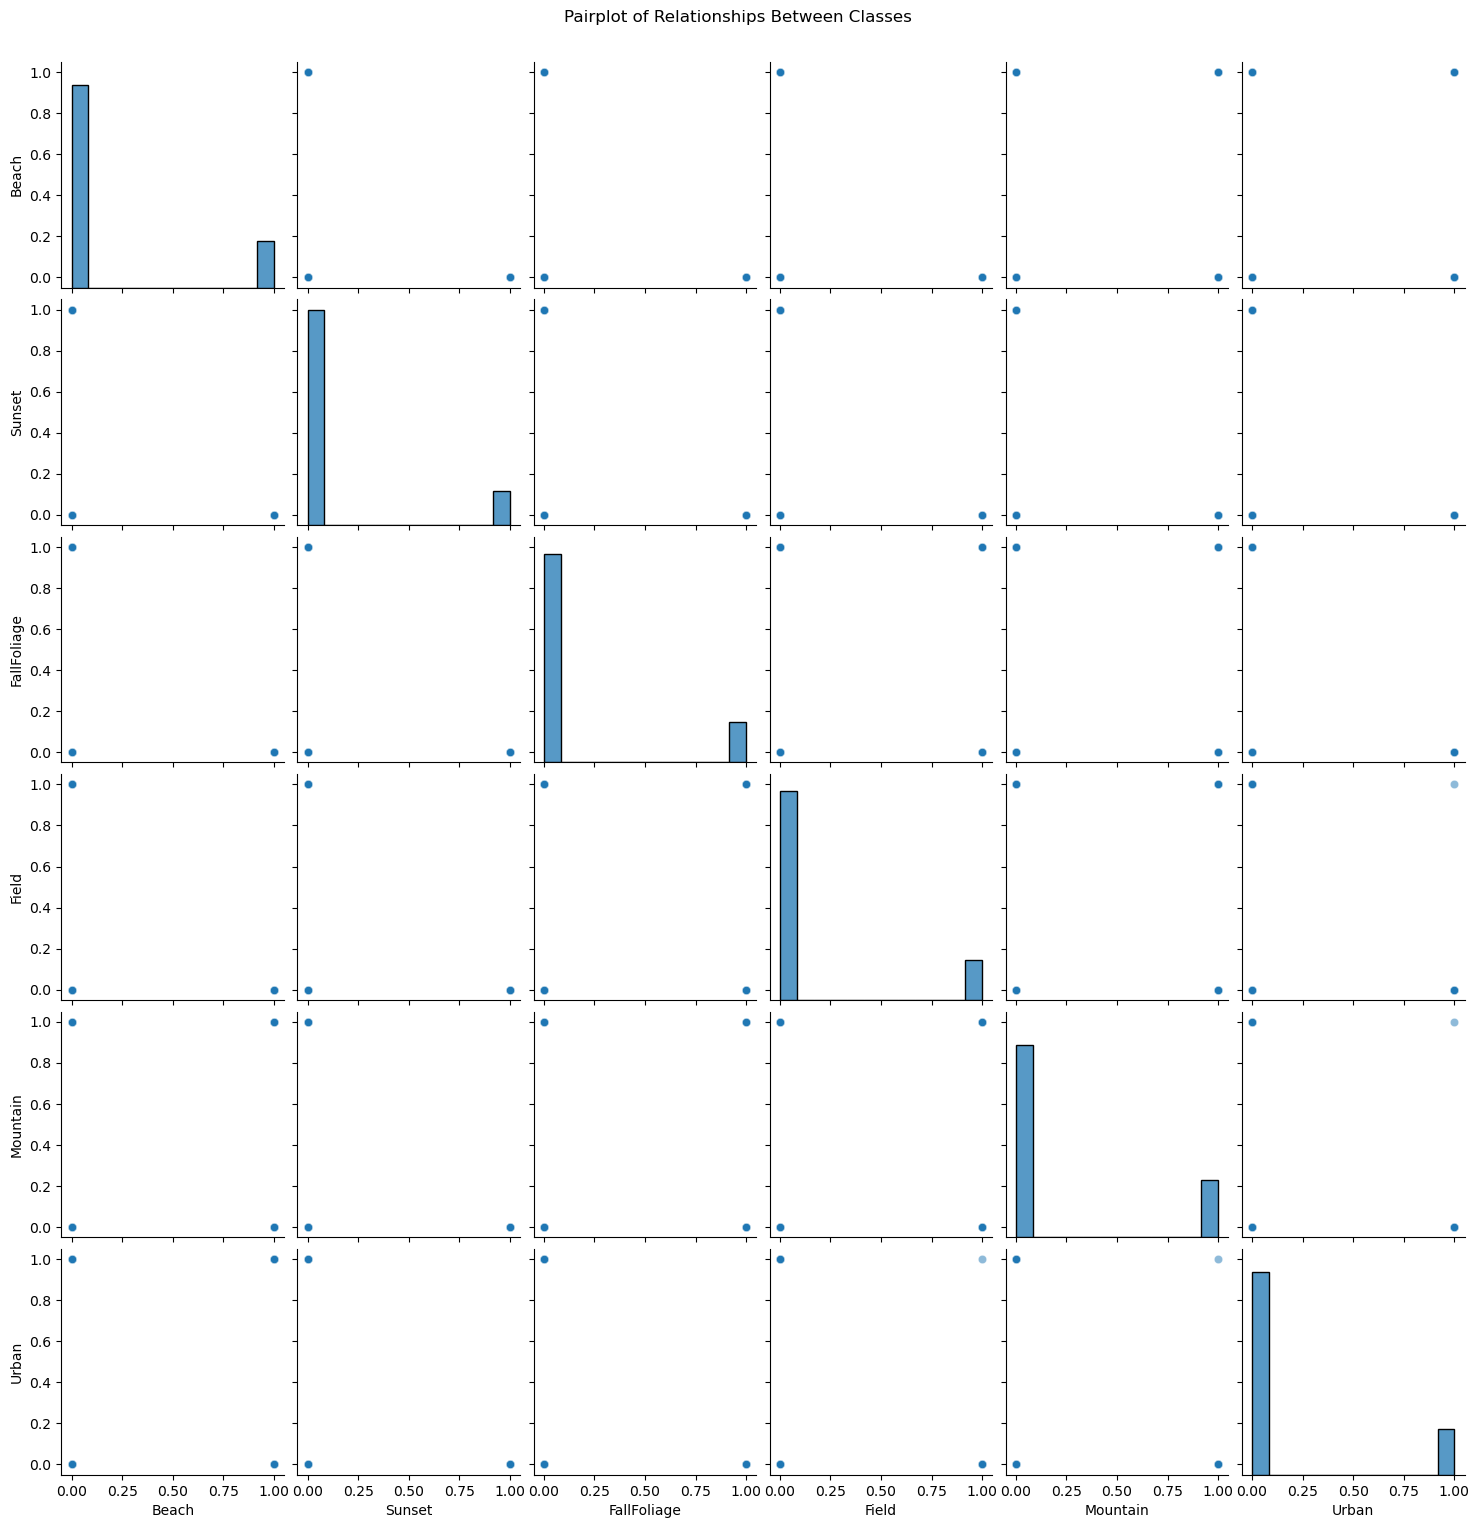

/home/pyla/miniconda3/envs/bfn2/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pyla/miniconda3/envs/bfn2/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pyla/miniconda3/envs/bfn2/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pyla/miniconda3/envs/bfn2/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. 

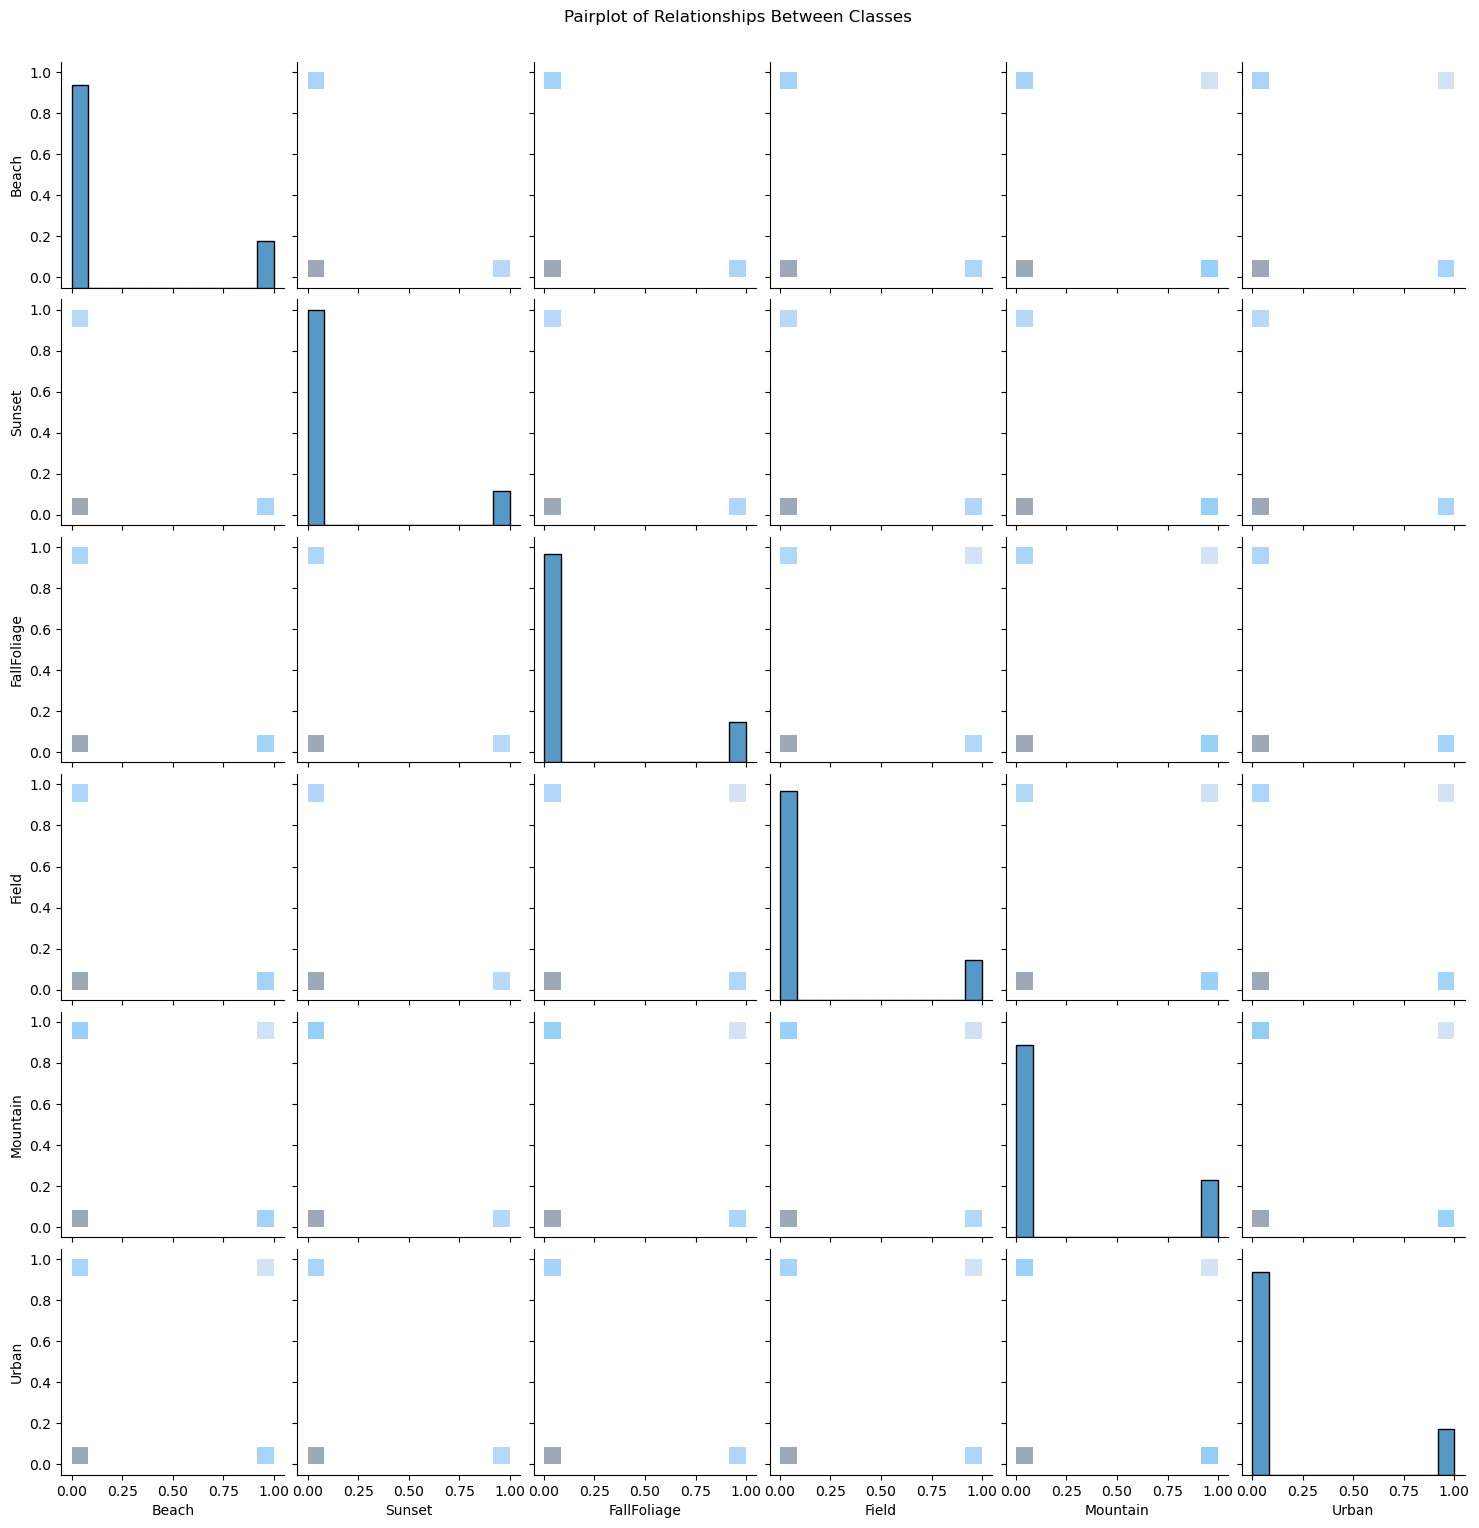

/home/pyla/miniconda3/envs/bfn2/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pyla/miniconda3/envs/bfn2/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pyla/miniconda3/envs/bfn2/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pyla/miniconda3/envs/bfn2/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. 

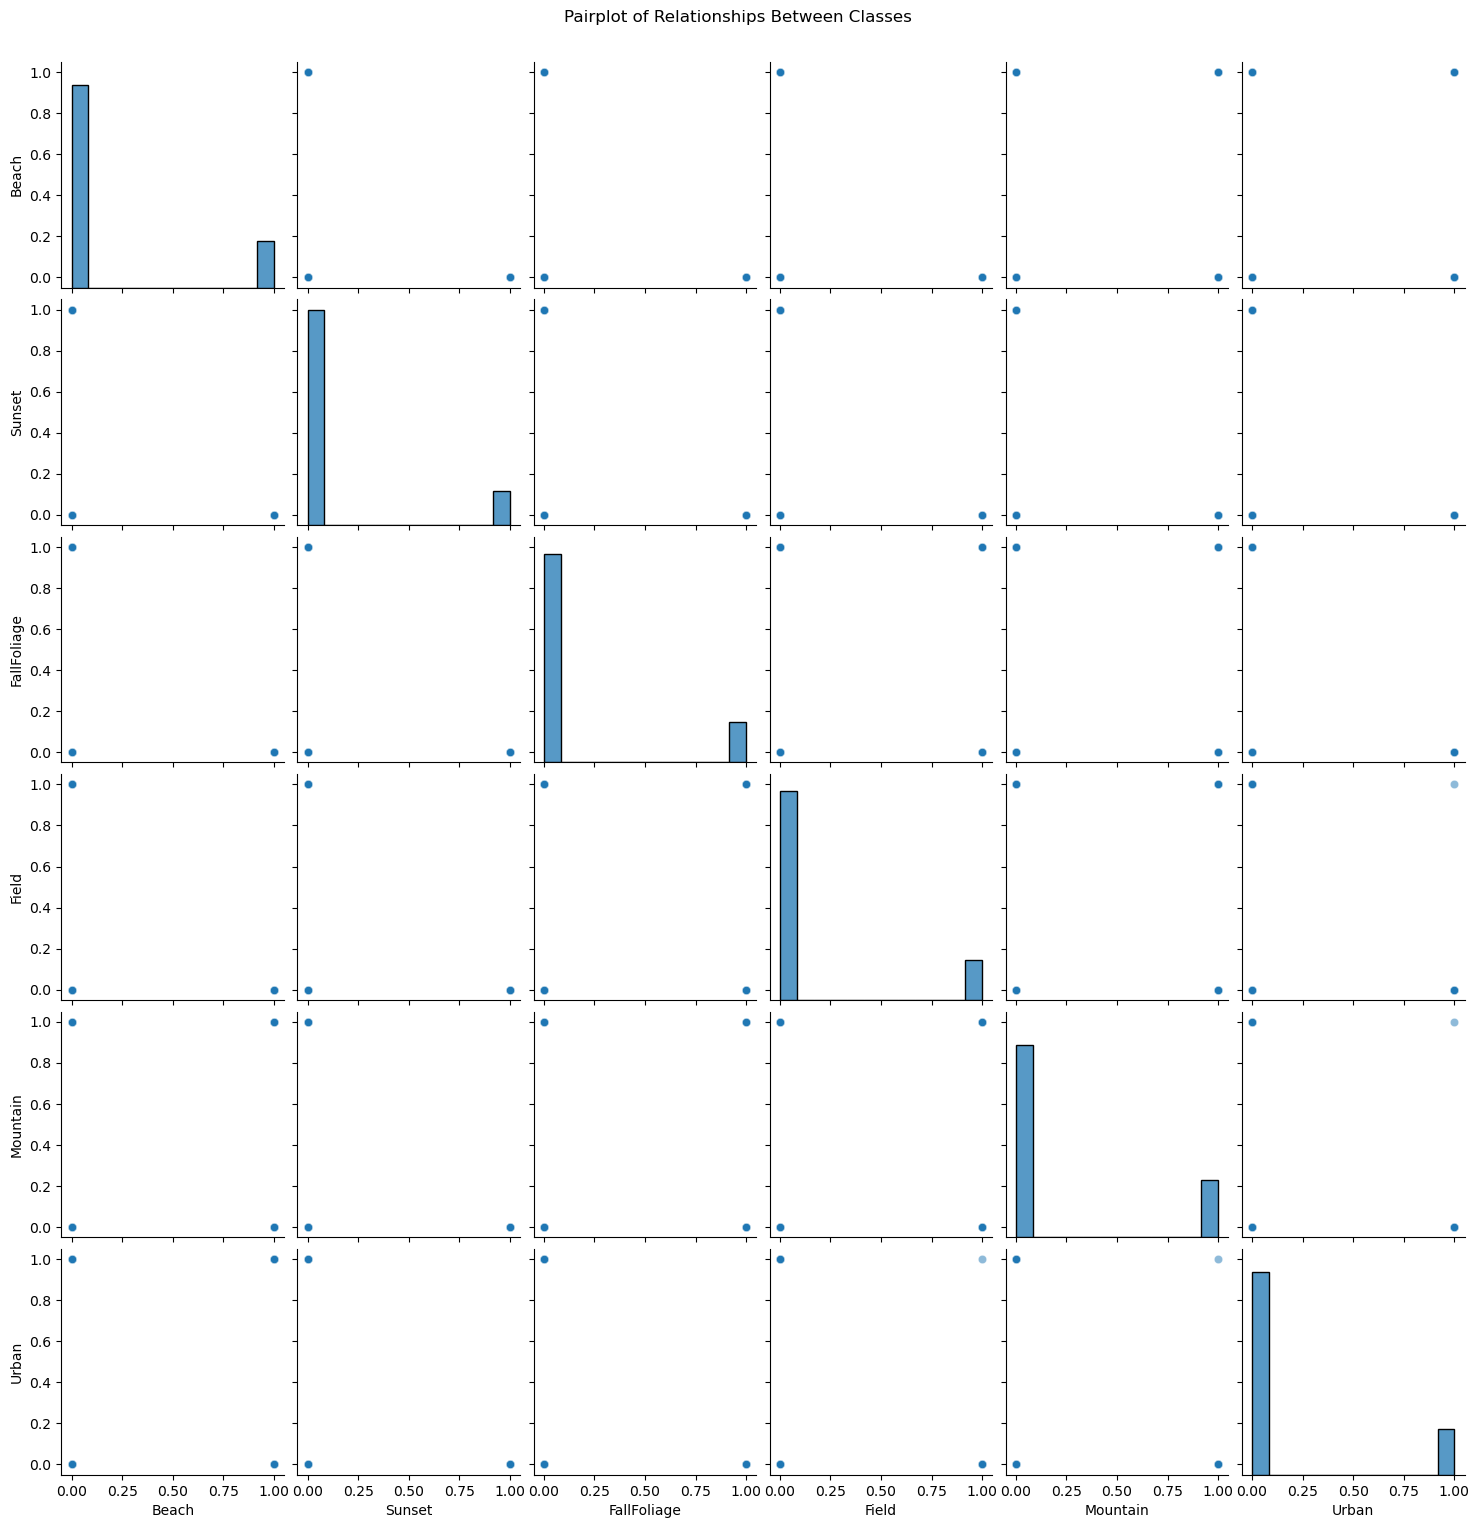

/home/pyla/miniconda3/envs/bfn2/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pyla/miniconda3/envs/bfn2/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pyla/miniconda3/envs/bfn2/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pyla/miniconda3/envs/bfn2/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. 

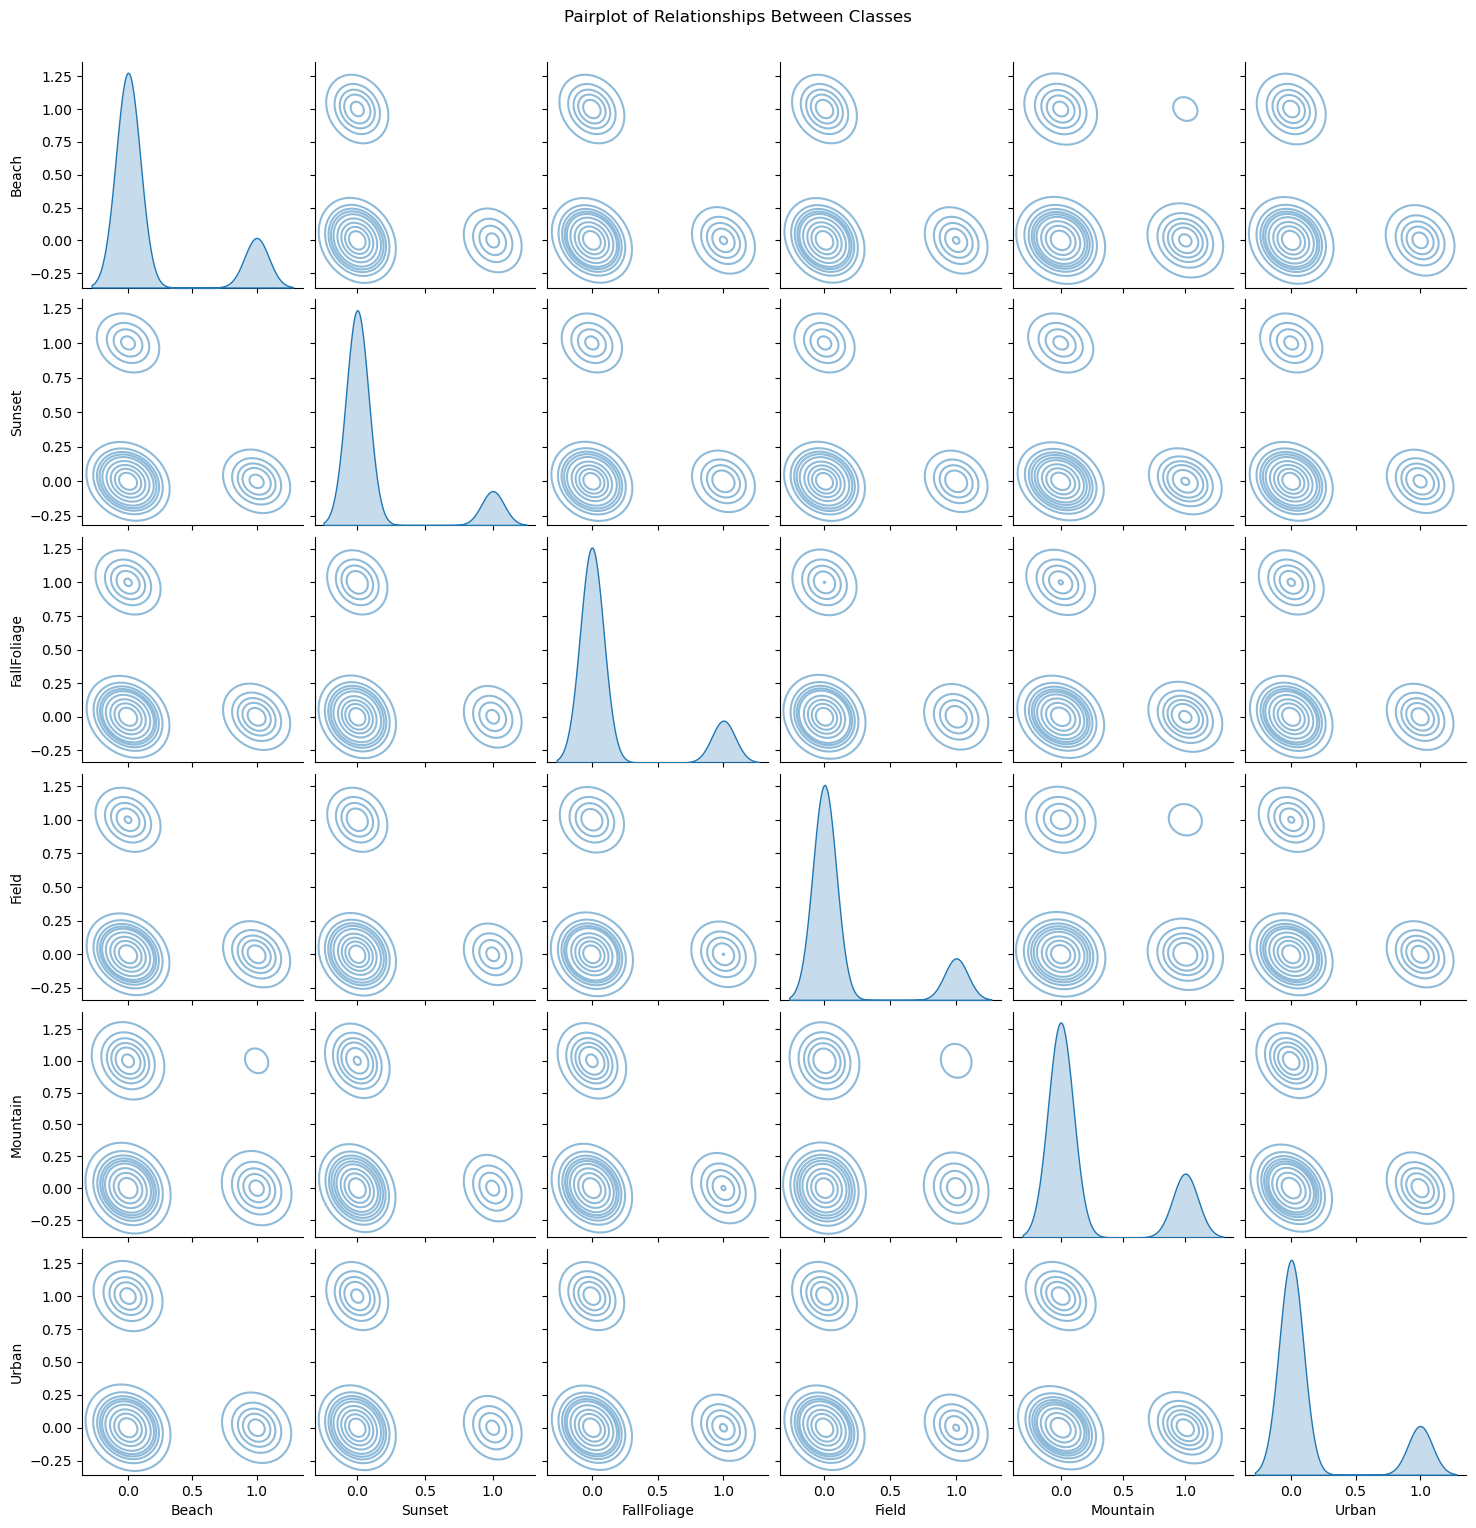

In [ ]:
positive_counts = train_labels.sum()
positive_counts_normalized = positive_counts / len(train_labels)
print("Normalized positive samples for each class:\n", positive_counts_normalized)

plt.figure(figsize=(10, 6))
positive_counts_normalized.plot(kind='bar')
plt.title('Normalized Positive Samples for Each Class')
plt.xlabel('Class')
plt.ylabel('Normalized Count')
plt.show()
correlation_matrix = train_labels.corr()
print("Correlation matrix:\n", correlation_matrix)

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, annot_kws={"size": 8})
plt.title('Correlation Matrix Between Classes')
plt.show()
positive_class_counts = train_labels.sum(axis=1)
print("Distribution of the number of positive classes for each data point:\n", positive_class_counts.value_counts())

plt.figure(figsize=(10, 6))
positive_class_counts.value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Number of Positive Classes per Data Point')
plt.xlabel('Number of Positive Classes')
plt.ylabel('Count')
plt.show()

sns.pairplot(train_labels, kind='scatter', plot_kws={'alpha':0.5})
plt.suptitle('Pairplot of Relationships Between Classes', y=1.02)
plt.show()

# sns.pairplot(train_labels, kind='hist', plot_kws={'alpha':0.5})
# plt.suptitle('Pairplot of Relationships Between Classes', y=1.02)
# plt.show()

# sns.pairplot(train_labels, kind='scatter', diag_kind="hist", plot_kws={'alpha':0.5})
# plt.suptitle('Pairplot of Relationships Between Classes', y=1.02)
# plt.show()

# sns.pairplot(train_labels, kind="kde", plot_kws={'alpha':0.5})
# plt.suptitle('Pairplot of Relationships Between Classes', y=1.02)
# plt.show()

In [35]:
# --- Device configuration ---
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

# --- Hyper-parameters ---
input_size = len(input_features)
hidden_size = 100
n_hidden = 1
num_classes = len(classes)
batch_size = 128
num_epochs = 200
learning_rate = 1e-3

train_df = train_data[input_features]
train_ls = train_labels[classes]

cutoff = math.floor(train_df.shape[0]/2.)
first_half_data = train_df[:cutoff]
last_half_data = train_df[cutoff:]
first_half_ls = train_ls[:cutoff]
last_half_ls = train_ls[cutoff:]

m = FfnClf(input_size, hidden_size, num_classes, batch_size, device, learning_rate, num_epochs, verbose=False)
print(m.model)

clf = BinaryRelevance(classifier=FfnClf(input_size, hidden_size, num_classes, batch_size, device, learning_rate, num_epochs, verbose=False))
# clf.fit(first_half_data, first_half_ls)

preds_last_half = clf.predict(last_half_data.values)


clf = BinaryRelevance(classifier=FfnClf(input_size, hidden_size, num_classes, batch_size, device, learning_rate, num_epochs, verbose=False))
# clf.fit(last_half_data, last_half_ls)

# preds_first_half = clf.predict(first_half_data.values)

# preds_first = np.asarray(preds_first_half.todense())
# preds_last = np.asarray(preds_last_half.todense())
# preds_combined = np.vstack((preds_first, preds_last))
# errors = train_ls.values - preds_combined
# error_df = pd.DataFrame(errors, columns = classes)

cpu
FFN(
  (input): Linear(in_features=294, out_features=100, bias=True)
  (out): Linear(in_features=100, out_features=1, bias=True)
)


AttributeError: 'BinaryRelevance' object has no attribute 'model_count_'

In [26]:
clf

AttributeError: 'FfnClf' object has no attribute 'hidden_size'

AttributeError: 'FfnClf' object has no attribute 'hidden_size'

AttributeError: 'FfnClf' object has no attribute 'hidden_size'

In [22]:
error_df.to_pickle('error_df.pkl')

In [23]:
error_df

,Beach,Sunset,FallFoliage,Field,Mountain,Urban
0,1.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
1206,-1.0,0.0,0.0,0.0,0.0,1.0
1207,0.0,0.0,0.0,0.0,0.0,1.0
1208,-1.0,0.0,-1.0,0.0,0.0,1.0
1209,-1.0,0.0,0.0,0.0,0.0,1.0


In [24]:
error_df.to_csv('error_df.csv')

In [25]:
num_rows_all_zero = (error_df == 0).all(axis=1).sum()
print(num_rows_all_zero)

12
